# Documentation

You will need to provide a number of files for intempt to be able to process the model:

* a pickle file containing the datacolumns from intempt used for the model
* a pickle file containing the pre-process performed on the data from intempt
* a pickle file containing the transform performed on the data from intempt
* a pickle file containing the model itself after training
* the libraries used for your process (requirements.txt)


### Define pickle function

This section is optional and is based on your preferences but for ease of use we suggest creating a function that will take care of creating the pickle file. So create once but call it anytime needed

In [1]:
import dill as pickle

def save_pkl(object_to_store, name: str, path: str = './'):
    """
    :param object_to_store: object to pickle
    :param name: name to save pickle
    :param path: path to save pickle
    """
    with open('{}/{}.pkl'.format(path, name), 'wb') as file:
        pickle.dump(object_to_store, file)

## Load Data

In [2]:
from fastavro import parse_schema, json_reader
from pandas import DataFrame

schemas = {}
schema = {
    'doc': 'Predict Customer Churn',
    'name': 'Churn',
    'namespace': 'test',
    'type': 'record',
    'fields': [
        {'name': 'customerID', 'type': 'string'},
        {'name': 'gender', 'type': 'string'},
        {'name': 'SeniorCitizen', 'type': 'int'},
        {'name': 'Partner', 'type': 'string'},
        {'name': 'Dependents', 'type': 'string'},
        {'name': 'tenure', 'type': 'int'},
        {'name': 'PhoneService', 'type': 'string'},
        {'name': 'MultipleLines', 'type': 'string'},
        {'name': 'InternetService', 'type': 'string'},
        {'name': 'OnlineSecurity', 'type': 'string'},
        {'name': 'OnlineBackup', 'type': 'string'},
        {'name': 'DeviceProtection', 'type': 'string'},
        {'name': 'TechSupport', 'type': 'string'},
        {'name': 'StreamingTV', 'type': 'string'},
        {'name': 'StreamingMovies', 'type': 'string'},
        {'name': 'Contract', 'type': 'string'},
        {'name': 'PaperlessBilling', 'type': 'string'},
        {'name': 'PaymentMethod', 'type': 'string'},
        {'name': 'MonthlyCharges', 'type': 'float'},
        {'name': 'TotalCharges', 'type': 'float'},
        {'name': 'Churn', 'type': 'string'}
    ],
}

schemas['churn'] = parse_schema(schema)


def load(collection):
    records = []
    with open(collection + '.json', 'r') as fo:
        avro_reader = json_reader(fo, schemas[collection])
        for record in avro_reader:
            records.append(record)
    return records


data = {
    'org_id': 1,  # organization id (added by the "loader")
    'churn': [load('churn')],  # bonuses for this user
}


dataframe = DataFrame(data)
dataframe.head()

,org_id,churn
0,1,"[{'customerID': '6823-SIDFQ', 'gender': 'Male'..."


In [3]:
import ast
import pandas as pd 
import numpy as np

# Get bonus data
churn_df1 = dataframe['churn'].astype(str).dropna().apply(ast.literal_eval)
churn_df2 = pd.concat([pd.DataFrame(x) for x in churn_df1], keys=churn_df1.index)
churn = dataframe[['org_id']].join(churn_df2.reset_index(level=1, drop=True)).reset_index(drop=True)

# replace blanks with np.nan
churn['TotalCharges'] = churn['TotalCharges'].replace(' ', np.nan)
# convert to float64
churn['TotalCharges'] = churn['TotalCharges'].astype('float64')

# Convert Target to 1 and 0
churn.loc[churn['Churn'] == 'Yes', 'Churn'] = 1
churn.loc[churn['Churn'] == 'No', 'Churn'] = 0

churn['Churn'].astype('int')

churn.head()

,org_id,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,6823-SIDFQ,Male,0,No,No,28,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),18.25,534.70,0
1,1,9764-REAFF,Female,0,Yes,No,59,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,0
2,1,0827-ITJPH,Male,0,No,No,36,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),18.55,689.00,0
3,1,9945-PSVIP,Female,0,Yes,Yes,25,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,18.70,383.65,0
4,1,0621-CXBKL,Female,0,No,No,53,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.70,1005.70,0


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   org_id            7032 non-null   int64  
 1   customerID        7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


In [5]:
def create_transformer(tr_name):
            from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder

            if tr_name == 'one_hot':
                cols_tr = OneHotEncoder(handle_unknown='ignore')
            elif tr_name == 'robust':
                cols_tr = RobustScaler()
            elif tr_name == 'minmax':
                cols_tr = MinMaxScaler()
            return cols_tr

column_stats = pd.DataFrame()
transformers_list = dict()

scalar_cols = [x for x in list(churn.select_dtypes(include=['float64', 'int64']))]
categorical_cols = [x for x in list(churn.select_dtypes(include=['object']))]

# We don't need to preprocess those columns
scalar_cols.remove('org_id')
categorical_cols.remove('customerID')

stats_cols = ['kurtosis', 'skew']  # , 'median', 'iqr', 'mad', 'mean', 'std', 'min', 'max']


for fun in stats_cols:
     column_stats[str(fun)] = churn[scalar_cols].apply(fun)

ks_rule = column_stats.loc[(abs(column_stats['skew']) > 3) | (column_stats['kurtosis'] > 3)].index

skewed_cols = list(set(ks_rule)) 
normalized_cols = list(set(scalar_cols) - set(skewed_cols)) 


print('Original Columns = ' + str(churn.shape[1]))
print('--------------------------------------------------------')
print('Skewed Columns = ' + str(len(skewed_cols)) + ': ' + str(skewed_cols))
print('Normalized Columns = ' + str(len(normalized_cols)) + ': ' + str(normalized_cols)) 
print('categorical Columns = ' + str(len(categorical_cols)) + ': ' + str(categorical_cols)) 

print('--------------------------------------------------------')
print('Total Columns Transformed = ' + str(len(skewed_cols) + len(normalized_cols) + len(categorical_cols)))
      

# for skewed_col in skewed_cols:
#         sk_cols_tr = create_transformer('robust')
#         sk_cols_tr.fit(churn[skewed_col].values.reshape(-1, 1))
#         transformers_list[skewed_col] = sk_cols_tr
        
# for norm_col in normalized_cols:
#         norm_cols_tr = create_transformer('minmax')
#         norm_cols_tr.fit(churn[norm_col].values.reshape(-1, 1))
#         transformers_list[norm_col] = norm_cols_tr        

# for skewed_col in skewed_cols:
#         num_cols_tr = transformers_list[skewed_col]
#         churn[skewed_col] = num_cols_tr.transform(churn[skewed_col].values.reshape(-1, 1))

# for norm_col in normalized_cols:
#         num_cols_tr = transformers_list[norm_col]
#         churn[norm_col] = num_cols_tr.transform(churn[norm_col].values.reshape(-1, 1))



Original Columns = 22
--------------------------------------------------------
Skewed Columns = 0: []
Normalized Columns = 4: ['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'tenure']
categorical Columns = 16: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
--------------------------------------------------------
Total Columns Transformed = 20


In [6]:
churn.head()

,org_id,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,6823-SIDFQ,Male,0,No,No,28,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),18.25,534.70,0
1,1,9764-REAFF,Female,0,Yes,No,59,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,0
2,1,0827-ITJPH,Male,0,No,No,36,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),18.55,689.00,0
3,1,9945-PSVIP,Female,0,Yes,Yes,25,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,18.70,383.65,0
4,1,0621-CXBKL,Female,0,No,No,53,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.70,1005.70,0


## Create feature_names.pkl

You might have downloaded all the data avaialble from Intempt but your model is only using a subset of that data. We would need to know what data we would need to feed the model

In [7]:
feature_names = ['churn']

In [8]:
# Use save_pkl function to store feature_names object
save_pkl(object_to_store = feature_names, name = "feature_names")

## Create preprocess_function.pkl

If any preprocess occured on the dataloaded from intempt we would need to know this process so we can apply it from our end. This step can be skipped since you might be using aggrepages directly from Intempt. In such a case you just need to define something like:

In case you added some content or created your own aggregates make sure to include them in the function:

In [9]:
def preprocess_function(dataframe) -> pd.DataFrame:
    import ast
    import pandas as pd 
    import numpy as np

    # Get bonus data
    churn_df1 = dataframe['churn'].astype(str).dropna().apply(ast.literal_eval)
    churn_df2 = pd.concat([pd.DataFrame(x) for x in churn_df1], keys=churn_df1.index)
    churn = dataframe[['org_id']].join(churn_df2.reset_index(level=1, drop=True)).reset_index(drop=True)

    # replace blanks with np.nan
    churn['TotalCharges'] = churn['TotalCharges'].replace(' ', np.nan)
    # convert to float64
    churn['TotalCharges'] = churn['TotalCharges'].astype('float64')
    
    # Convert Target to 1 and 0
    churn.loc[churn['Churn'] == 'Yes', 'Churn'] = 1
    churn.loc[churn['Churn'] == 'No', 'Churn'] = 0
    
    churn['Churn'].astype('int')
    
    return(churn)

save_pkl(object_to_store = preprocess_function, name = "preprocess_function")


## Create model_transform.pkl

You will be performing a number of transforms using the **sklearn** library. You will need to define a ColumnTransformer which will be used in a Pipeline to selectively prepare the columns of your dataset before fitting a model on the transformed data. Once you decided what transforms to apply store the transform. For example:

In [10]:
churn.groupby(['Churn'])['Churn'].count()

Churn
0    5163
1    1869
Name: Churn, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder

import pandas as pd

churn_features = churn.drop(['Churn','org_id','customerID'], axis = 1)
churn_target = churn['Churn'].astype(int).values

# Fake data
x_train, x_test, y_train, y_test = train_test_split(churn_features, churn_target, test_size=0.30)

# ColumnTransformer 
transformer = ColumnTransformer(transformers=[
    ('tnf1',MinMaxScaler(),['MonthlyCharges', 'SeniorCitizen', 'TotalCharges', 'tenure']),
    ('tnf2',OneHotEncoder(),['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
],remainder='passthrough')

# ColumnTransformer fitted
transform_fitted = transformer.fit(x_train)


In [12]:
# Use save_pkl function to store model_transform object
save_pkl(object_to_store = transform_fitted, name = "model_transform")

## Create model.pkl

In this step after creating the model with the apropriate tests & reports you will need to perform different runs with different parameters that satisfy your business needs. Once you are happy just save the model: 

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import plot_confusion_matrix

# fit a lightGBM model to the data
model = LogisticRegression(max_iter=300)


# PreProcess Data
x_train_transform_pre_processed = transform_fitted.transform(x_train)

# Fit & Train Model
model.fit(x_train_transform_pre_processed, y_train)

LogisticRegression(max_iter=300)

In [14]:
# Test the model
# make predictions
expected_y  = y_test
x_test_transform_pre_processed = transform_fitted.transform(x_test)

predicted_y = model.predict(x_test_transform_pre_processed)

In [15]:
print('Light GBM Model classification'); print(metrics.classification_report(expected_y, predicted_y))



Light GBM Model classification
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.66      0.53      0.59       571

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



/Users/tonycini/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


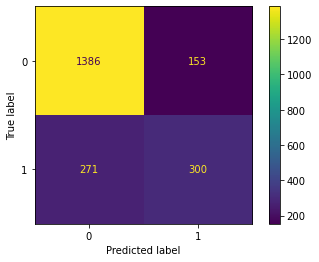

In [16]:
plot_confusion_matrix(model, x_test_transform_pre_processed, y_test)

In [17]:
# Use save_pkl function to store model_transform object
save_pkl(object_to_store = model, name = "model")


## Model Predict Flow


In [18]:
from fastavro import parse_schema, json_reader
from pandas import DataFrame

schemas = {}
schema = {
    'doc': 'Predict Customer Churn',
    'name': 'Churn',
    'namespace': 'test',
    'type': 'record',
    'fields': [
        {'name': 'customerID', 'type': 'string'},
        {'name': 'gender', 'type': 'string'},
        {'name': 'SeniorCitizen', 'type': 'int'},
        {'name': 'Partner', 'type': 'string'},
        {'name': 'Dependents', 'type': 'string'},
        {'name': 'tenure', 'type': 'int'},
        {'name': 'PhoneService', 'type': 'string'},
        {'name': 'MultipleLines', 'type': 'string'},
        {'name': 'InternetService', 'type': 'string'},
        {'name': 'OnlineSecurity', 'type': 'string'},
        {'name': 'OnlineBackup', 'type': 'string'},
        {'name': 'DeviceProtection', 'type': 'string'},
        {'name': 'TechSupport', 'type': 'string'},
        {'name': 'StreamingTV', 'type': 'string'},
        {'name': 'StreamingMovies', 'type': 'string'},
        {'name': 'Contract', 'type': 'string'},
        {'name': 'PaperlessBilling', 'type': 'string'},
        {'name': 'PaymentMethod', 'type': 'string'},
        {'name': 'MonthlyCharges', 'type': 'float'},
        {'name': 'TotalCharges', 'type': 'float'},
        {'name': 'Churn', 'type': 'string'}
    ],
}

schemas['churn'] = parse_schema(schema)


def load(collection):
    records = []
    with open(collection + '.json', 'r') as fo:
        avro_reader = json_reader(fo, schemas[collection])
        for record in avro_reader:
            records.append(record)
    return records[1:2]


data = {
    'org_id': 1,  # organization id (added by the "loader")
    'churn': [load('churn')],  # bonuses for this user
}

data
dataframe = DataFrame(data)
dataframe.head()

,org_id,churn
0,1,"[{'customerID': '9764-REAFF', 'gender': 'Femal..."


In [19]:
def local_load_pkl_model(model_name: str, path: str = './'):
    """
    :param model_name: name of pickled model to load
    :param path: path to the pickled model
    :return: the pickle model
    """
    with open('{}/{}.pkl'.format(path, model_name), 'rb') as file:
        b = pickle.load(file)

    return b

print('Loading pre-process function')
preprocess_function = local_load_pkl_model(model_name=f'preprocess_function')
preprocess_data = preprocess_function(dataframe)
preprocess_data.drop(['Churn'], axis =1, inplace =True)
    
    
print('Loading Transform Pipeline')
model_transform = local_load_pkl_model(model_name=f'model_transform')
print('Transform the loaded data using the Model Transform')
transformed_data = model_transform.transform(preprocess_data)
    
    
print('load pre-trained model')
model = local_load_pkl_model(model_name=f"model")

print('Predict Self Exclution using Model')
preprocess_data[f'churn'] = model.predict(transformed_data) 
    
prediction = preprocess_data[['org_id', 'customerID', 'churn']]
prediction.head()


Loading pre-process function
Loading Transform Pipeline
Transform the loaded data using the Model Transform
load pre-trained model
Predict Self Exclution using Model


,org_id,customerID,churn
0,1,9764-REAFF,0


## requirements.txt

The final step would be to provide us with all the libraries that those pkl objects are using. So for example in the model code cell you are importing **lightgbm** so we will need to know about this library. The **requirements.txt** correspond to used libraries and packages for your enviornment:

lightgbm <br>
scikit-learn <br>
pandas <br>
dill

**So for the above examples it's pretty straight forward and the contents of this file are the above 3 libraries.**

Note that if you have some version dependency of a specific library make sure to define the specific version
required. For example:

lightgbm == 3.3.2 <br>
scikit-learn == 0.24.2 <br>
pandas == 1.3.4 <br>
dill